In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [3]:
ecb=pd.read_csv('/Users/alexandrabessarabova/code/bess92/Deciphering_Central_Banks/raw_data/all_ECB_speeches.csv',delimiter='|')
ecb.drop(columns=['subtitle'],inplace=True)

In [55]:
fed=pd.read_csv('/Users/alexandrabessarabova/code/bess92/Deciphering_Central_Banks/raw_data/all_fed_speeches.csv')
fed.drop(columns=['link','event','year','text_len','location'],inplace=True)
fed.rename(columns={"text": "contents",'speaker':'speakers'},inplace=True)

In [51]:
ecb.head()
ecb.columns

Index(['date', 'speakers', 'title', 'contents', 'clean_text'], dtype='object')

In [78]:
fed['date']=pd.to_datetime(fed.date,format='%Y%m%d')
ecb['date']=pd.to_datetime(ecb.date)
fed=fed[['date','speakers','title','contents']]
fed.head()


,date,speakers,title,contents
0,1996-12-19,Vice Chair Alice M. Rivlin,Supervision of bank risk-taking,I discovered when I joined the Board of Govern...
1,1996-12-06,Chairman Alan Greenspan,Social security,I am privileged to accept the Union League of...
2,1996-12-05,Chairman Alan Greenspan,The challenge of central banking in a democrat...,The Challenge of Central Banking in a Democrat...
3,1996-12-03,"Governor Edward W. Kelley, Jr.",Clearinghouses and risk management,It is a pleasure to be with you this morning ...
4,1996-11-25,Governor Susan M. Phillips,Supervisory and regulatory responses to financ...,Supervisory and Regulatory Responses to Financ...


In [5]:
ecb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2815 entries, 0 to 2814
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2815 non-null   object
 1   speakers  2811 non-null   object
 2   title     2815 non-null   object
 3   subtitle  2814 non-null   object
 4   contents  2713 non-null   object
dtypes: object(5)
memory usage: 110.1+ KB


In [79]:
ecb=ecb.dropna()
fed=fed.dropna()

In [7]:
ecb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2713 entries, 0 to 2814
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2713 non-null   object
 1   speakers  2713 non-null   object
 2   title     2713 non-null   object
 3   subtitle  2713 non-null   object
 4   contents  2713 non-null   object
dtypes: object(5)
memory usage: 127.2+ KB


In [80]:
ecb=ecb[~ecb['contents'].str.contains(" der ")]
ecb=ecb[~ecb['contents'].str.contains(" la ")].reset_index(drop=True)
cbs=pd.concat([ecb,fed],axis=0)
cbs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3782 entries, 0 to 1455
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3782 non-null   datetime64[ns]
 1   speakers    3782 non-null   object        
 2   title       3782 non-null   object        
 3   contents    3782 non-null   object        
 4   clean_text  2329 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 177.3+ KB


In [9]:
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

In [10]:
def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    cleaned = ' '.join(lemmatized) # Join back to a string
    return cleaned


In [11]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandrabessarabova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
ecb['clean_text'] = ecb.contents.apply(clean)
fed['clean_text'] = fed.contents.apply(clean)
cbs['clean_text'] = cbs.contents.apply(clean)

In [49]:
ecb.head()

,date,speakers,title,contents,clean_text
0,2024-08-30,Isabel Schnabel,The euro area inflation outlook: a scenario an...,SPEECH The euro area inflation outlook: a s...,speech euro area inflation outlook scenario an...
1,2024-08-24,Philip R. Lane,The effectiveness and transmission of monetary...,SPEECH The effectiveness and transmission o...,speech effectiveness transmission monetary pol...
2,2024-07-23,Philip R. Lane,Opening remarks,SPEECH Opening remarks Welcome address by...,speech opening remark welcome address philip r...
3,2024-07-01,Christine Lagarde,Monetary policy in an unusual cycle: the risks...,SPEECH Monetary policy in an unusual cycle:...,speech monetary policy unusual cycle risk path...
4,2024-06-26,Philip R. Lane,Modern monetary analysis,SPEECH Modern monetary analysis Speech b...,speech modern monetary analysis speech philip ...


In [14]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data_vectorized = vectorizer.fit_transform(ecb['clean_text'])

lda_model = LatentDirichletAllocation(n_components=3)

lda_vectors = lda_model.fit_transform(data_vectorized)

In [15]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [16]:
print_topics(lda_model, vectorizer)

Topic 0:
[('financial', 30891.013377005896), ('bank', 21880.679902487704), ('market', 19051.640162061085), ('risk', 15296.081662262466), ('crisis', 10288.091481857811), ('policy', 9216.16274505309), ('banking', 7564.081613266917), ('liquidity', 7068.146184557434), ('system', 6900.515549984676), ('area', 6607.9101381993505)]
Topic 1:
[('policy', 33670.03465001874), ('monetary', 26329.45712362411), ('rate', 21444.662198032813), ('inflation', 21245.76254681885), ('price', 19247.09526053878), ('euro', 17263.72549742482), ('area', 17235.329507745933), ('growth', 13310.305633272732), ('economic', 13048.343945432453), ('term', 12225.309334068888)]
Topic 2:
[('euro', 22675.311593215643), ('european', 15949.212178551516), ('market', 12679.167976950936), ('bank', 12080.696897945183), ('area', 11808.760354053858), ('ecb', 9551.679422061037), ('country', 9499.151310850859), ('also', 8508.238618942269), ('central', 8387.404588825993), ('financial', 7868.452310458821)]


In [17]:
lda_vectors = lda_model.transform(vectorizer.transform(ecb['clean_text']))

In [18]:
topics=pd.DataFrame({'topic':[np.argmax(i) for i in lda_vectors]})

In [19]:
ecb_topics=pd.concat([ecb,topics],axis=1)

In [64]:
ecb_topics[ecb_topics.topic==0]
cbs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3782 entries, 0 to 1455
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        3782 non-null   object
 1   speakers    3782 non-null   object
 2   title       3782 non-null   object
 3   contents    3782 non-null   object
 4   clean_text  2329 non-null   object
dtypes: object(5)
memory usage: 177.3+ KB


### AGGREGATE LDA

In [75]:
all_data_vectorized = vectorizer.fit_transform(cbs['clean_text'])

lda_model_all = LatentDirichletAllocation(n_components=3)

lda_vectors_all = lda_model_all.fit_transform(all_data_vectorized)

In [87]:
print_topics(lda_model_all, vectorizer)
cbs.tail()

Topic 0:
[('federal', 17124.164186826787), ('reserve', 14021.94289786057), ('market', 13618.975478915112), ('bank', 11890.717398502275), ('financial', 11598.161910324252), ('rate', 9552.803312959479), ('return', 9391.98951184984), ('year', 9198.315908479712), ('business', 8503.817139321953), ('percent', 8396.603356704212)]
Topic 1:
[('financial', 44840.55421742166), ('bank', 43835.352501335634), ('market', 34213.49717371036), ('risk', 29026.590694542447), ('euro', 22749.984505877248), ('european', 17849.105782935836), ('banking', 16750.6312744294), ('system', 16597.830545410092), ('area', 15771.378141351623), ('also', 15586.252998275691)]
Topic 2:
[('policy', 56348.345681522005), ('monetary', 41216.83448659511), ('rate', 35331.82631746082), ('inflation', 34887.604712287706), ('price', 29749.28760778703), ('euro', 22950.67811346037), ('area', 22011.69553268546), ('economic', 21515.69789990773), ('growth', 19949.46247207665), ('economy', 18547.802263800306)]


,date,speakers,title,contents,clean_text
1451,2020-02-05,Governor Lael Brainard,The Digitalization of Payments and Currency: S...,I want to thank Darrell Duffie for inviting m...,want thank darrell duffie inviting discus futu...
1452,2020-01-17,Vice Chair for Supervision Randal K. Quarles,"Spontaneity and Order: Transparency, Accountab...",It's a great pleasure to be with you today at...,great pleasure today aba banking law committee...
1453,2020-01-16,Governor Michelle W. Bowman,The Outlook for Housing,Few sectors are as central to the success of ...,sector central success economy life american f...
1454,2020-01-09,Vice Chairman Richard H. Clarida,U.S. Economic Outlook and Monetary Policy,Thank you for the opportunity to join you bri...,thank opportunity join bright early january th...
1455,2020-01-08,Governor Lael Brainard,Strengthening the Community Reinvestment Act b...,Good morning. I am pleased to be here at the ...,good morning pleased urban institute discus st...


# WORD CLOUDS

In [21]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

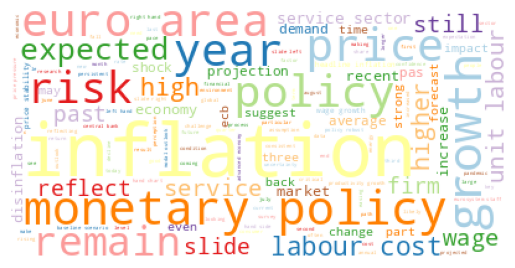

In [90]:
wc = WordCloud(background_color = 'white', contour_width = 2,
     contour_color = 'white', colormap = 'Paired').generate(ecb['clean_text'][0])
plt.axis("off")
plt.imshow(wc)

In [23]:
ecb_topics['date']=pd.to_datetime(ecb_topics.date)

In [ ]:
years=[*range(2006,2021)]

In [88]:
cbs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3782 entries, 0 to 1455
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3782 non-null   datetime64[ns]
 1   speakers    3782 non-null   object        
 2   title       3782 non-null   object        
 3   contents    3782 non-null   object        
 4   clean_text  3782 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 306.3+ KB


2006


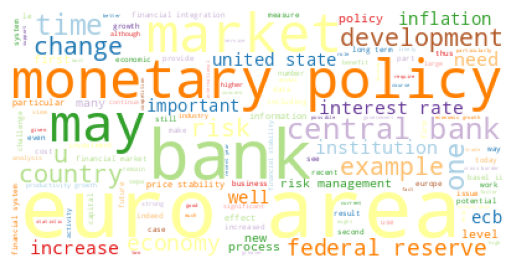

2007


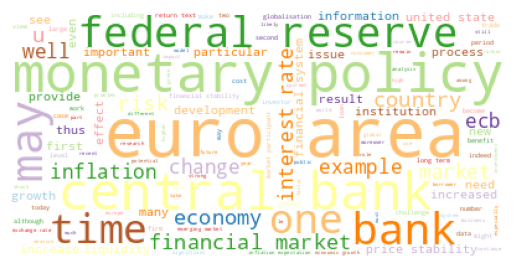

2008


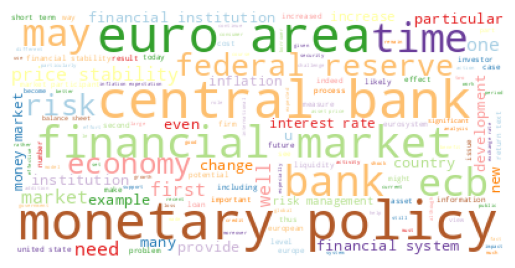

2009


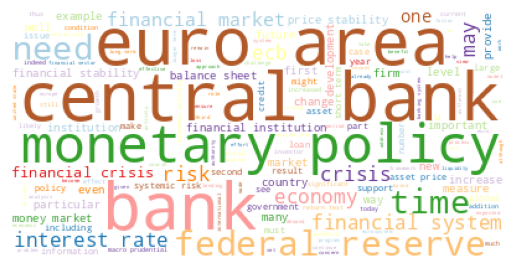

2010


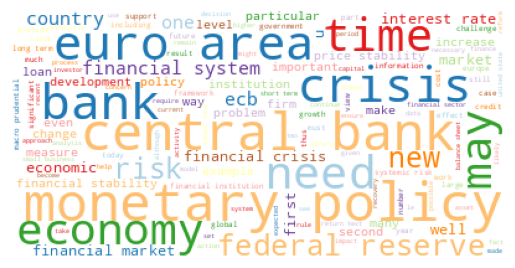

2011


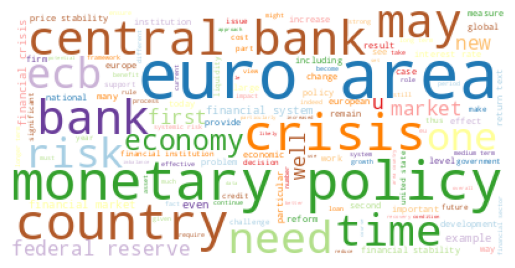

2012


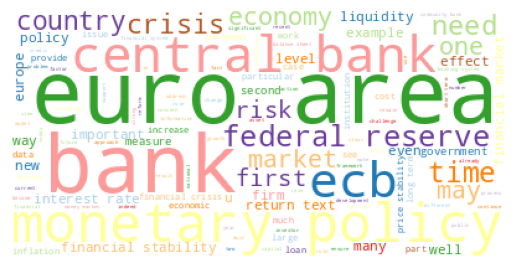

2013


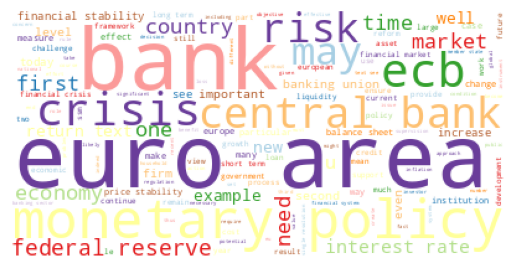

2014


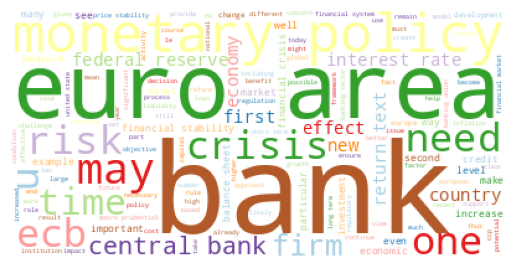

2015


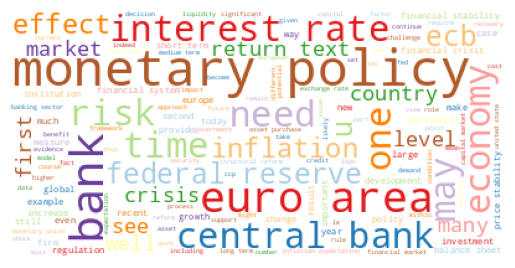

2016


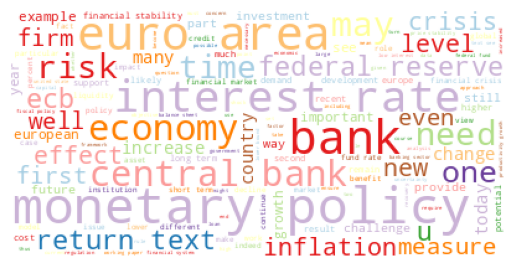

2017


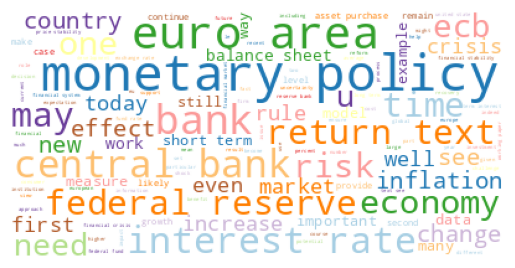

2018


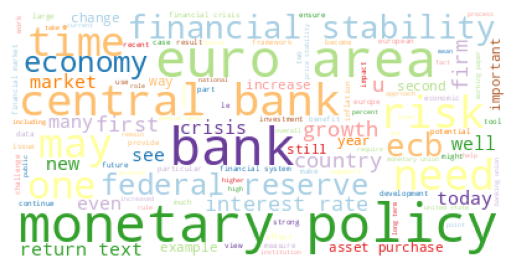

2019


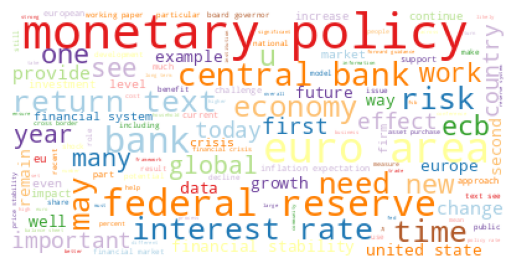

2020


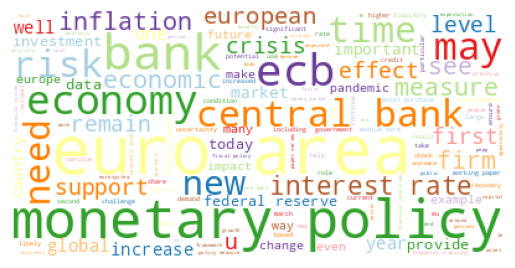

2021


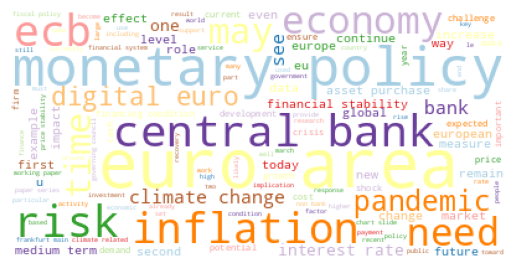

2022


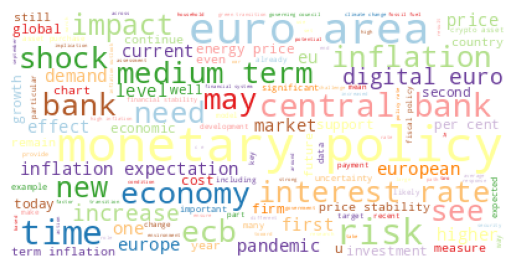

2023


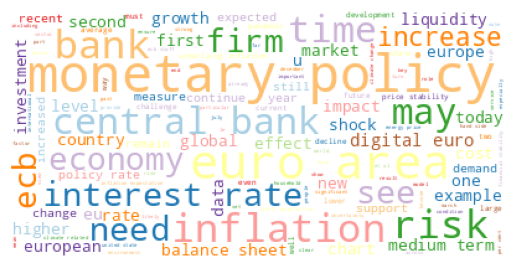

2024


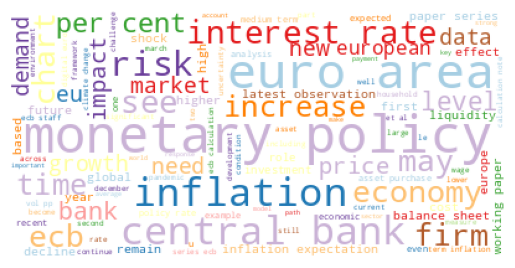

In [89]:
for i in years:
    df=cbs[cbs.date.dt.year==i]
    str=' '
    for k in range(len(df)):
        str=str+df['clean_text'].iloc[k]
    wc = WordCloud(background_color = 'white', contour_width = 2,
    contour_color = 'white', colormap = 'Paired').generate(str)
    print(i)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

# str=' '
# # ecb_topics.clean_text[0]
# print(str+ecb_topics.clean_text[0])
# df=ecb_topics[ecb_topics.date.dt.year==2020]
# df

In [31]:
df['clean_text'].iloc[0]

'speech keeping cyber risk bay individual joint responsibility introductory remark fabio panetta member executive board ecb fifth meeting euro cyber resilience board pan european financial infrastructure frankfurt main december last meeting euro cyber resilience board pan european financial infrastructure ecrb room ecb premise frankfurt main february launched cyber information intelligence sharing initiative ciisi eu already knew critical step addressing cyber threat know timely shortly meeting first wave coronavirus covid pandemic led strict containment measure across europe upcoming vaccine roll out light end tunnel mobility restriction likely remain place time restriction confronted u unparalleled challenge personal professional life response world taken giant leap forward term digitalisation public health situation finally improves go back old normal working home become norm many u adjusted way life certainly enjoy regaining ability move interact freely also learn lesson pandemic s

In [114]:
str=' '
for k in range(len(cbs)):
    str=str+cbs['clean_text'].iloc[k]

stopwords = ['mean','know','particular','case','example','see','possible','especially','including','include','view','addition','today','one','fact','still', 'thus', 'may', 'rather', 'require','many','moreover','make','well', 'return', 'text','indeed','given','although','first','u','even','second','much','need']


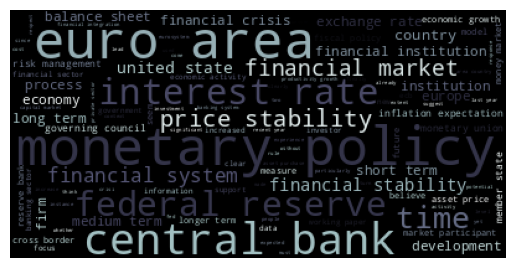

In [129]:
stopwords = ['become','reason','reflect','le','number','overall','another','result','seen','approach','generally','set','same','work','large','regard','appear','issue','problem','effect','benefit','concern','change','part','important','course','might','current','different','continue','use','like','likely','way','therefore','provide','allow','far','would','third','often','could','also','however','would like','mean','know','particular','case','example','see','possible','especially','including','include','view','addition','today','one','fact','still', 'thus', 'may', 'rather', 'require','many','moreover','make','well', 'return', 'text','indeed','given','although','first','u','even','second','much','need']
wc = WordCloud(stopwords=stopwords,background_color = 'black', contour_width = 2,
    contour_color = 'white', colormap = 'bone').generate(str)
plt.imshow(wc)
plt.axis("off")
plt.show()